# CASE STUDY: Stroke Dataset

### Inspecting  the database

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


-------

## Data Manipulation

##### 1. Gender

In [6]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
df[df.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [8]:
df.gender = df.gender.apply(lambda x:1 if x == 'Male' else 0)
df.gender.unique()

array([1, 0], dtype=int64)

###### 2. ever_married

In [9]:
df.ever_married.unique()
df.ever_married = df.ever_married.apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
df[df.ever_married == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


###### 3. Residence_type

In [11]:
df.Residence_type.unique()
df.Residence_type = df.Residence_type.apply(lambda x: 1 if x == 'Urban' else 0)

###### 4. bmi

In [12]:
sum(df.bmi.isnull())

201

In [13]:
df.bmi = df.bmi.fillna(df.bmi.mean(),axis = 0)
sum(df.bmi.isnull())

0

----------------------------
## EDA

Making Continuous Variable to an Categorical Variable for plotting purpose

In [14]:
import matplotlib.pyplot as plt, seaborn as sns

In [15]:
bmi_slot = ['Under-weight','Healthy','Overweight','Obese']
df['cate_bmi'] = pd.cut(df.bmi,[-1,18.5,25,30,100],labels = bmi_slot)

In [16]:
age_slot = ['infant','child','teenager','adult','senior-citizen']
df['cate_age'] = pd.cut(df.age,[-1,5,13,20,50,100],labels = age_slot)

In [17]:
def plott(df,x):
    fig,axes= plt.subplots(figsize =(15,7)) 
    axes = sns.countplot(data=df,x = x, hue= 'stroke', order=df[x].unique())
    count = 0
    for i in df[x].unique():
        total_count = len(df[df[x]==i])
        stroke = len(df.gender[df[x]==i][df.stroke==1])
        no_stroke = total_count - stroke
        has_stroke = round((stroke/total_count)*100,5)
        doesnt_has_stroke = round((no_stroke/total_count)*100,5)
        annote = [doesnt_has_stroke,has_stroke]
        n_count = df[x].nunique()-1
        for n in range(2):
            p = axes.patches[n+count+(n_count*n)]
            axes.annotate('{:.1f}%'.format(annote[n]),(p.get_x()+0.2,p.get_height()+40))
        count+=1
    return fig,axes


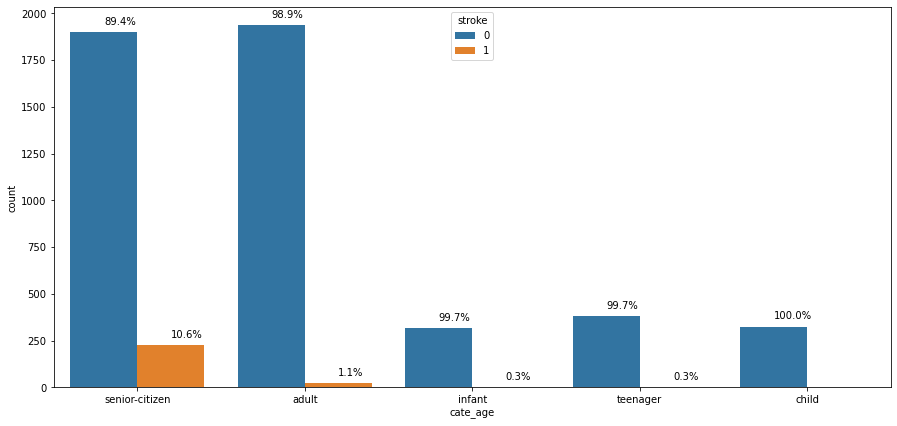

In [18]:
plott(df,'cate_age')
plt.show()

###### Insight: Elder people are at more risk to stroke. 

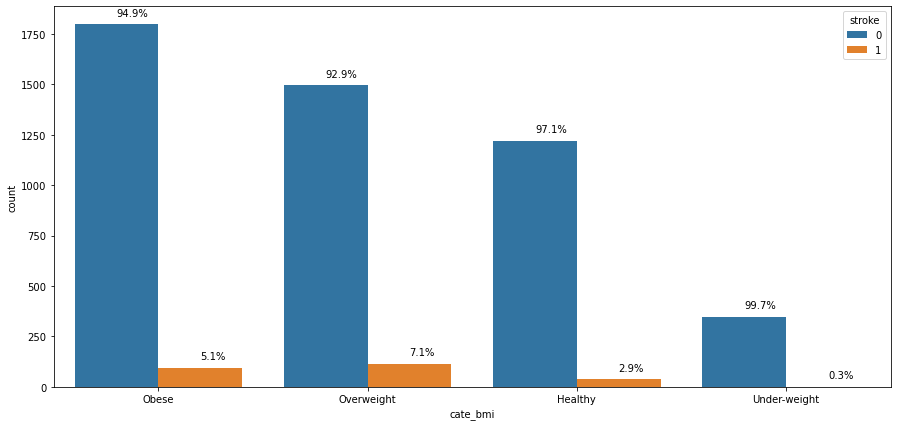

In [19]:
plott(df,'cate_bmi')
plt.show()

##### Insight: Risk of stroke is significantly higher for people with bmi > 25

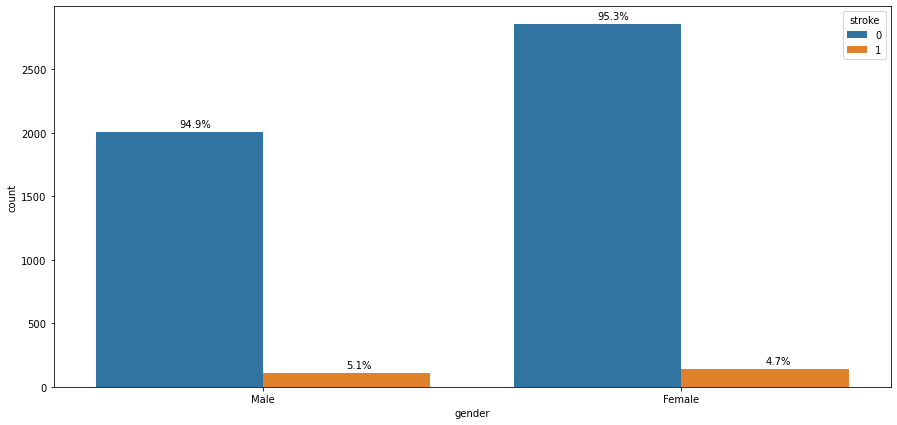

In [20]:
fig,axes = plott(df,'gender')
label = ['Male','Female']
axes.set_xticklabels(label)
plt.show()

###### Insight: There isn't much effect of gender on having stroke as per our dataset.

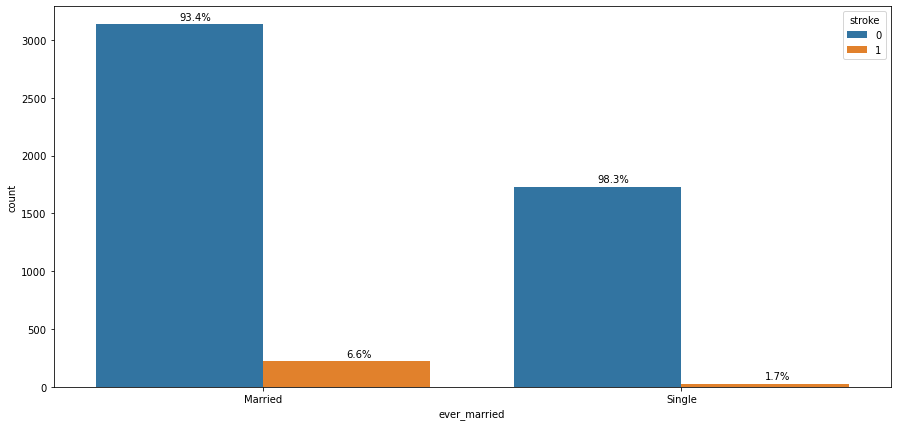

In [21]:
fig,axes = plott(df,'ever_married')
axes.set_xticklabels(['Married','Single'])
plt.show()

##### Insight: Marriage brings in more risk of having stroke, live long live happy #SingleForever

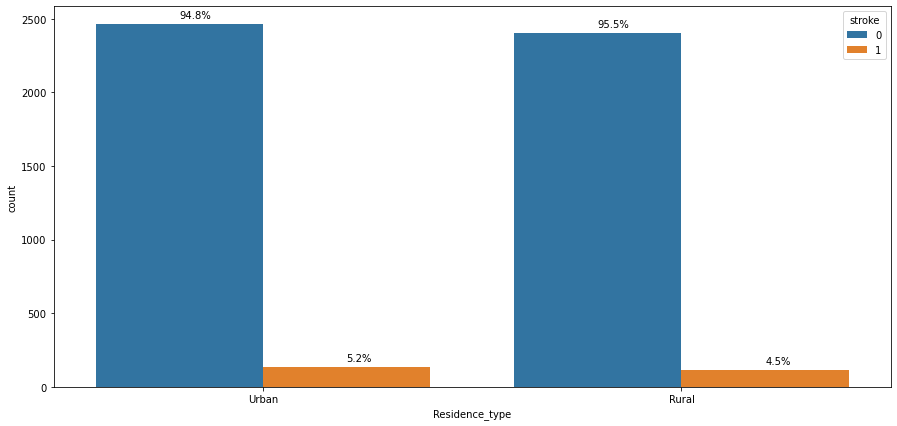

In [22]:
fig,axes = plott(df,'Residence_type')
axes.set_xticklabels(['Urban','Rural'])
plt.show()

##### Insight: It seems living in urban area can increase the risk of stroke but not to a significant level. 

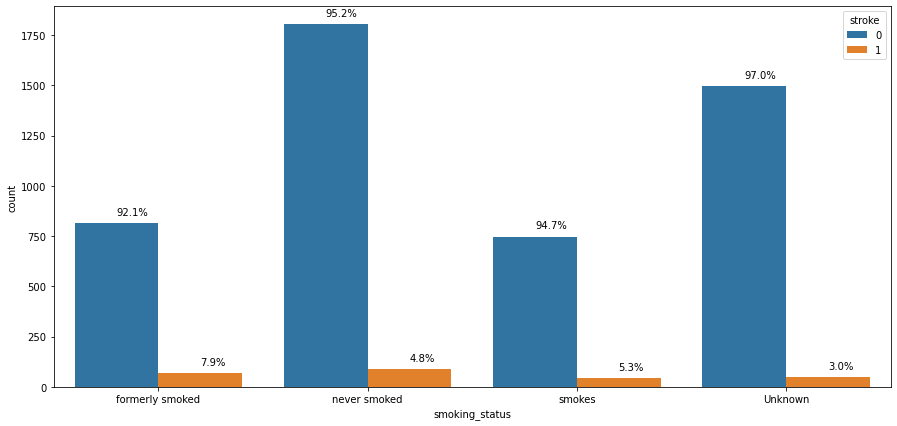

In [23]:
plott(df,'smoking_status')
plt.show()

##### Insight: People who had any smoking influence in their life are at more risk of having stroke. 

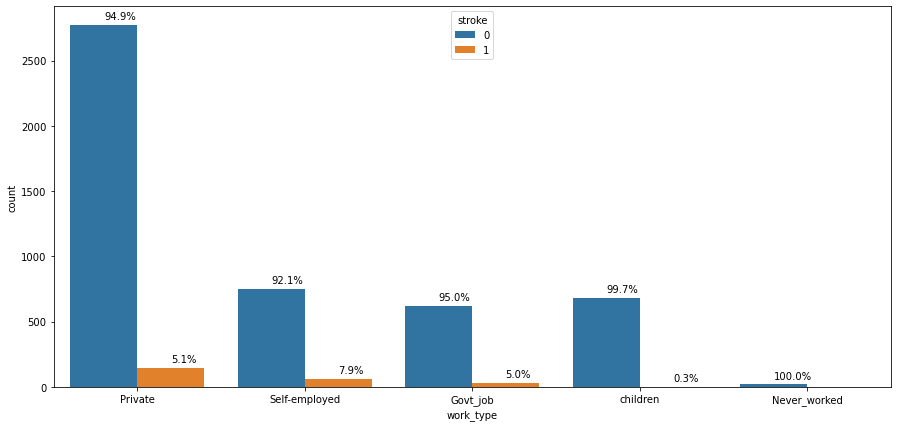

In [24]:
plott(df,'work_type')
plt.show()

##### Insight: Having a job greatly increases the chances of having stroke. It can be observed that self-employed people have significantly higher probablity of having stroke then Government Jobs or Private Jobs, this could be due to the benefits that one get from joining a private or government jobs aren't present in self-employed.

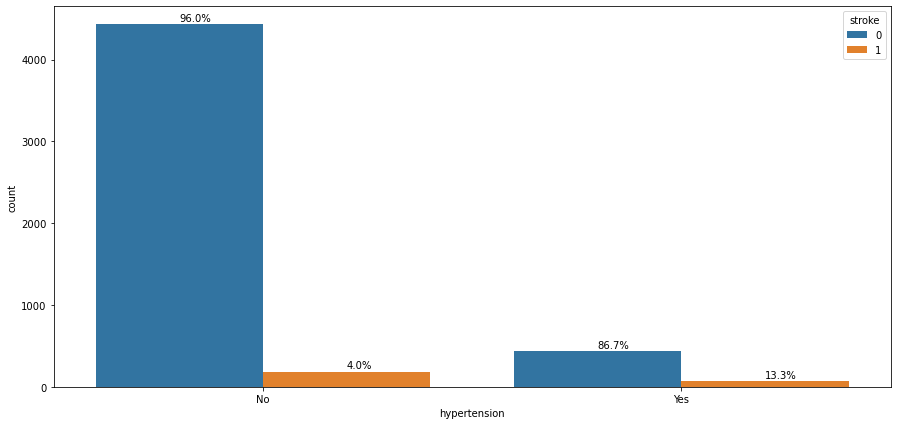

In [25]:
fig,axes = plott(df,'hypertension')
axes.set_xticklabels(['No','Yes'])
plt.show()

##### Insight: Hypertension is bad sign that can led to a possible stroke.

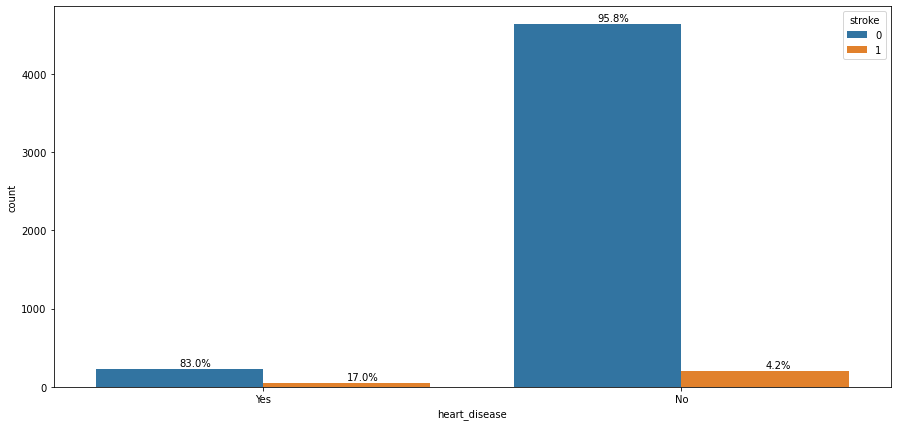

In [26]:
fig,axes = plott(df,'heart_disease')
axes.set_xticklabels(['Yes','No'])
plt.show()

##### Insight: A person with heart disease is more likely to get a stroke than an healthy person.


----------------
## Multivariate Analysis

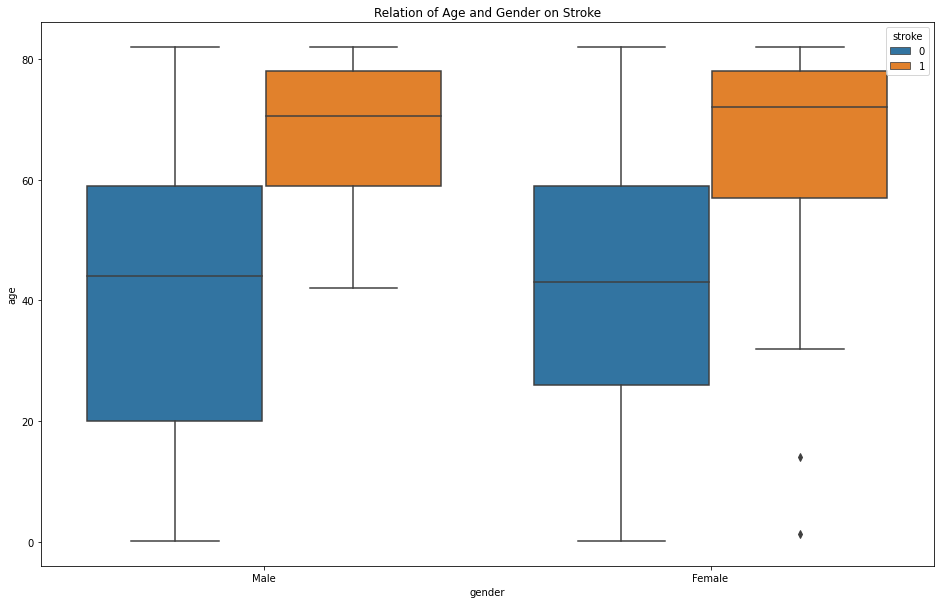

In [27]:
plt.figure(figsize=(16,10))
axes =sns.boxplot(data =df, x='gender', y='age', hue ='stroke' ,order = df.gender.unique())
plt.title('Relation of Age and Gender on Stroke')
label = ['Male','Female']
axes.set_xticklabels(label)
plt.show()

##### Insight: As expected senior citizens are at more risk of having stroke irrespective of their gender.

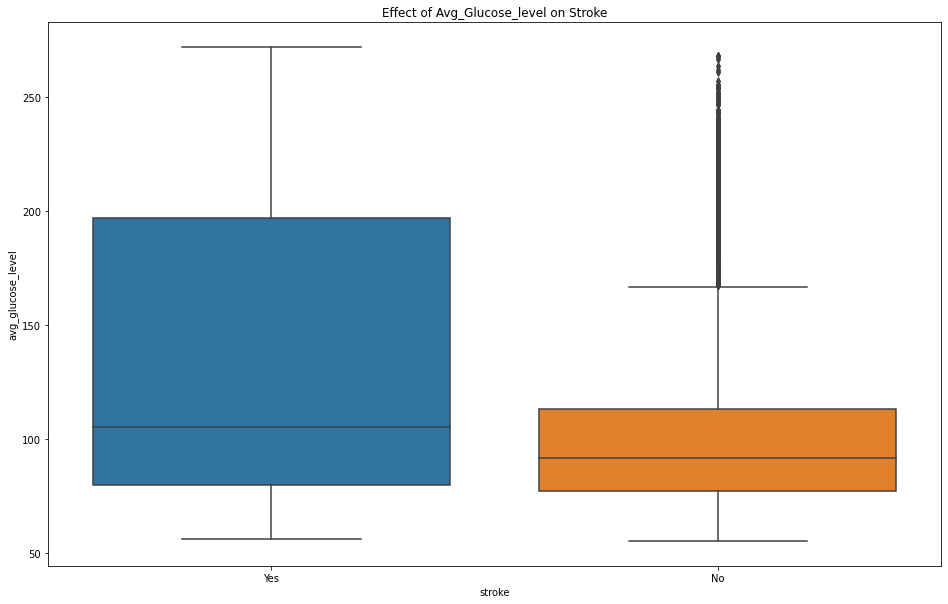

In [28]:
plt.figure(figsize=(16,10))
axes =sns.boxplot(data =df, y='avg_glucose_level', x='stroke' ,order = df.stroke.unique())
plt.title('Effect of Avg_Glucose_level on Stroke')
label = ['Yes','No']
axes.set_xticklabels(label)
plt.show()

##### Insight: In general low avg_glucose_level is better sign of not having stroke in near future. ;)

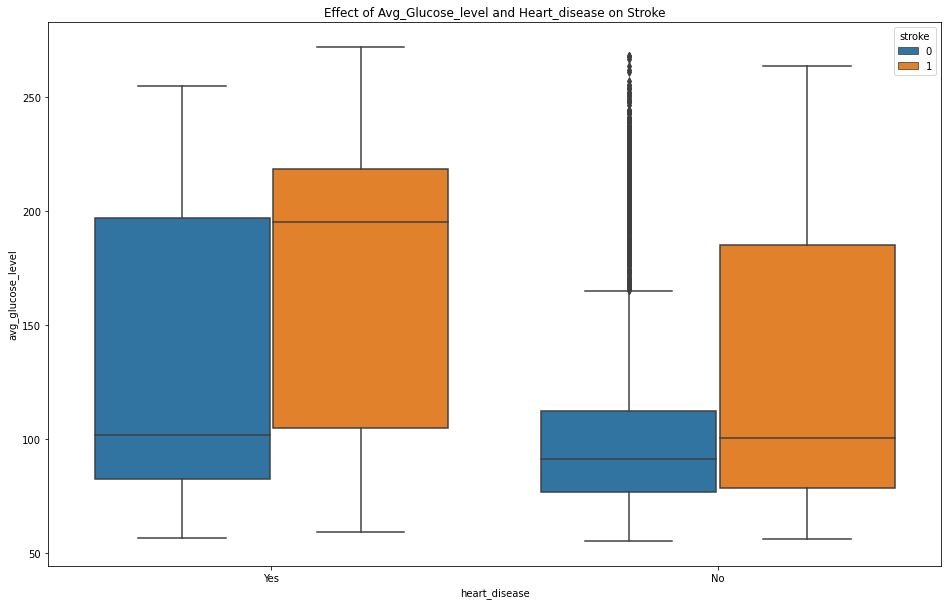

In [29]:
plt.figure(figsize=(16,10))
axes =sns.boxplot(data =df, y='avg_glucose_level', x='heart_disease',hue='stroke' ,order = df.heart_disease.unique())
plt.title('Effect of Avg_Glucose_level and Heart_disease on Stroke')
label = ['Yes','No']
axes.set_xticklabels(label)
plt.show()

##### Insight: Heart Disease along with high Average Glucose Level is a strong indicator of possible stroke.

### Summary:

1. The ***major determinant*** features of stroke are:
    
    a) **Age**
    
    b) **Marriage Status**
    
    c) **Heart Disease** 
    
    d) **Hypertension**
    
    
2. As per the dataset **gender** and **residence type** contributes significantly ***less*** on having stroke. 
3. **Self employed** people are ***more*** prone to stroke.
4. **Married** people experienced stork ***more*** than **Single** ones.
5. A healthy **bmi**, low **average glucose level**, and lack of **hypertension** greatly reduces the chances if having stroke.
6. As one grow old she/he has more responsibilities and has to deal with various hardships as a result of this stress we can see monotonically increase in people getting stoke as they grow old.

-------------------------------
## ML Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
df.drop(['cate_bmi','cate_age'],axis =1,inplace=True)

# Seprating label from dataset
y = df.stroke
X = df.drop('stroke',axis=1)

train_X, test_X, train_y,test_y = train_test_split(X,y,random_state= 1)

cate_feat = ['work_type','smoking_status']
for col in cate_feat:
    le = LabelEncoder()
    train_X[col] = le.fit_transform(train_X[col])
    test_X[col] = le.transform(test_X[col])
    
    

<ipython-input-31-32500cdded95>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[col] = le.fit_transform(train_X[col])
<ipython-input-31-32500cdded95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[col] = le.transform(test_X[col])


In [32]:
# decision tree
dec_tree = DecisionTreeClassifier(random_state=1)
dec_tree.fit(train_X,train_y)
pred = dec_tree.predict(test_X)
error = mae(test_y,pred)
error

0.09859154929577464

In [33]:

acc = accuracy_score(test_y,pred)
print('{:.2f}%'.format(acc*100))

90.14%


In [34]:
# Random Forest Classifier
estimators_list = [100,150,200,250,300]

for n in estimators_list:
    rand_for = RandomForestClassifier(n_estimators = n, random_state =1)
    pred= rand_for.fit(train_X,train_y).predict(test_X)
    loss = mae(test_y,pred)
    acc = accuracy_score(test_y,pred)
    print(loss,acc)
    

rand_for = RandomForestClassifier(n_estimators = 200, random_state =1)
pred= rand_for.fit(train_X,train_y).predict(test_X)
loss = mae(test_y,pred)
acc = accuracy_score(test_y,pred)
print('loss: {:.4f}, acc: {:.3f}%'.format(loss,acc*100))

0.0594679186228482 0.9405320813771518
0.0594679186228482 0.9405320813771518
0.05868544600938967 0.9413145539906104
0.0594679186228482 0.9405320813771518
0.0594679186228482 0.9405320813771518
loss: 0.0587, acc: 94.131%


In [35]:
# GradientBoosting Classifier
estimators_list = [25,50,75,100,125]
for n in estimators_list:
    gbc= GradientBoostingClassifier(loss = 'exponential',n_estimators = n,random_state= 1)
    pred = gbc.fit(train_X,train_y).predict(test_X)
    loss = mae(test_y,pred)
    print(n,loss)

gbc= GradientBoostingClassifier(loss = 'exponential',n_estimators = 100,random_state= 1)
pred = gbc.fit(train_X,train_y).predict(test_X)
loss = mae(test_y,pred)
acc = accuracy_score(test_y,pred)
print('loss: {:.4f}, acc: {:.3f}%'.format(loss,acc*100))

25 0.05868544600938967
50 0.05868544600938967
75 0.057902973395931145
100 0.057902973395931145
125 0.057902973395931145
loss: 0.0579, acc: 94.210%


In [36]:
final_model = GradientBoostingClassifier(loss = 'exponential',n_estimators = 100,random_state= 1)
pred = final_model.fit(train_X,train_y).predict(test_X)
loss = mae(test_y,pred)
acc = accuracy_score(test_y,pred)

In [37]:
print('loss: {:.4f}, acc: {:.3f}%'.format(loss,acc*100))

loss: 0.0579, acc: 94.210%
